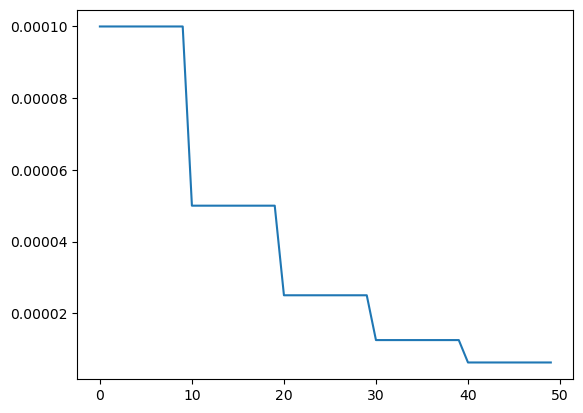

In [2]:
from matplotlib import pyplot as plt
from timm import create_model 
from timm.optim import create_optimizer
from types import SimpleNamespace
from timm.scheduler.cosine_lr import CosineLRScheduler
from timm.scheduler.step_lr import StepLRScheduler
def get_lr_per_epoch(scheduler, num_epoch):
    lr_per_epoch = []
    for epoch in range(num_epoch):
        lr_per_epoch.append(scheduler.get_epoch_values(epoch))
    return lr_per_epoch
model = create_model('resnet34')

args = SimpleNamespace()
args.weight_decay = 0
args.lr = 1e-4
args.opt = 'adam' 
args.momentum = 0.9

optimizer = create_optimizer(args, model)
num_epoch = 50
scheduler = StepLRScheduler(optimizer, decay_t = 10, decay_rate=0.5)
lr_per_epoch = get_lr_per_epoch(scheduler, num_epoch)

plt.plot([i for i in range(num_epoch)], lr_per_epoch);

In [5]:
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=1)
scheduler = optim.lr_scheduler.StepLR(optimizer, 30, gamma=0.98, last_epoch=-1, verbose=False)

In [7]:
scheduler.get_lr()

/home/qhy/anaconda3/envs/torch/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:381: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


[1]

In [10]:
lr = []
for i in range(500):
    scheduler.step()
    lr.append(scheduler.get_last_lr())


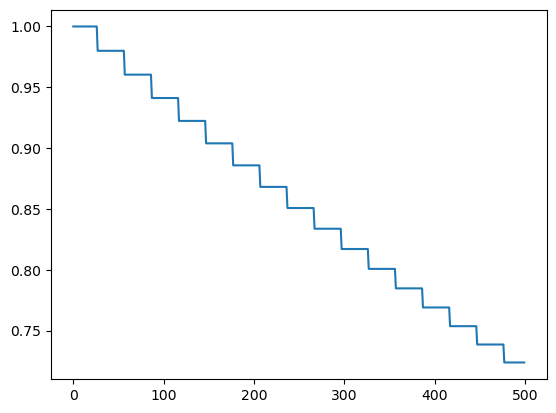

In [12]:
plt.plot([i for i in range(500)], lr);